# What changes between the different regions of the following time-series?

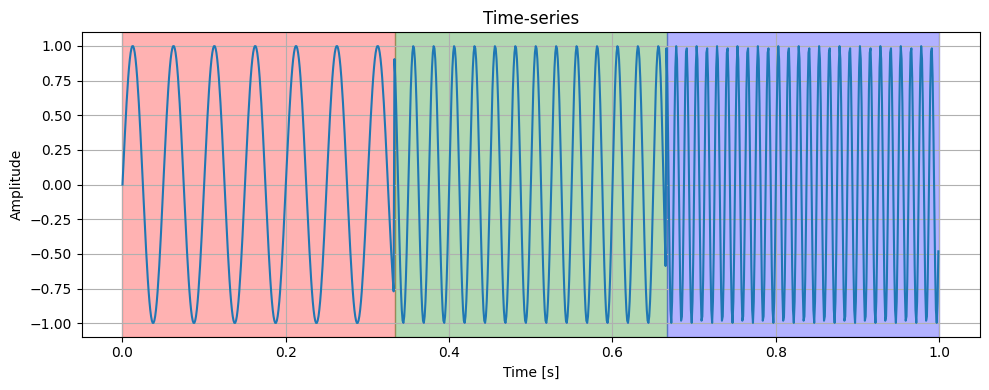

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with different frequencies at different periods
f1 = 20   # Frequency of the first segment (Hz)
f2 = 40  # Frequency of the second segment (Hz)
f3 = 80  # Frequency of the third segment (Hz)

# Define different segments
segment1 = np.sin(2 * np.pi * f1 * t[:int(len(t) / 3)])
segment2 = np.sin(2 * np.pi * f2 * t[int(len(t) / 3):int(2 * len(t) / 3)])
segment3 = np.sin(2 * np.pi * f3 * t[int(2 * len(t) / 3):])

# Combine segments into one signal
signal = np.concatenate((segment1, segment2, segment3))

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Signal')
plt.title('Time-series')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Highlight different frequency segments
plt.axvspan(0, T/3, color='red', alpha=0.3, label='20Hz')
plt.axvspan(T/3, 2*T/3, color='green', alpha=0.3, label='40Hz')
plt.axvspan(2*T/3, T, color='blue', alpha=0.3, label='80Hz')

# plt.legend()
plt.tight_layout()
plt.show()


### Fourier Transform
- The Fourier Transform is a mathematical operation that **transforms a signal from the time domain to the frequency domain**.
- It **breaks down a complex signal into (up to infinite) sum of sinusoidal components (Fourier Series)**, revealing the different frequencies present in the signal and their corresponding amplitudes.
- This is **useful for analyzing periodic behaviors and identifying dominant frequencies within a signal**, which are often difficult to observe directly in the time domain.



The Fourier series representation of a periodic function $ f(t) $ with period $ T $ is given by:

$$ f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos(n \omega t) + b_n \sin(n \omega t) \right) $$

where:

- $ \omega = \frac{2\pi}{T} $ is the fundamental or angular frequency
- $ n = 1, 2, 3, \ldots $ are the harmonic frequencies (integer multiples of the fundamental frequency)
- $ a_0 $, $ a_n $, and $ b_n $ are the Fourier coefficients

The Fourier coefficients are calculated using the following integrals:

$$ a_0 = \frac{1}{T} \int_0^T f(t) \, dt $$

$$ a_n = \frac{2}{T} \int_0^T f(t) \cos(n \omega t) \, dt $$

$$ b_n = \frac{2}{T} \int_0^T f(t) \sin(n \omega t) \, dt $$

In [6]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def f(t):
    # Define your function here; example: a square wave
    return np.sign(np.sin(t))

# Parameters
T = 2 * np.pi  # period

# Calculate the coefficients
def a0(T):
    result, _ = quad(f, 0, T)
    return (1 / T) * result

def an(n, T):
    result, _ = quad(lambda t: f(t) * np.cos(n * 2 * np.pi * t / T), 0, T)
    return (2 / T) * result

def bn(n, T):
    result, _ = quad(lambda t: f(t) * np.sin(n * 2 * np.pi * t / T), 0, T)
    return (2 / T) * result

# Initialize parameters for the animation
t = np.linspace(0, T, 400, endpoint=False)
f_t = np.vectorize(f)(t)
N_max = 50  # Maximum number of terms in the Fourier series

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], label='Fourier Series Approximation', linestyle='--', color='red')
ax.plot(t, f_t, label='Original function', linewidth=2, color='black')
ax.set_xlim(0, T)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Fourier Series Approximation')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.grid(True)
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(n):
    fourier_series = np.full_like(t, a0(T) / 2)  # Start with a0/2
    for k in range(1, n + 1):
        fourier_series += an(k, T) * np.cos(k * 2 * np.pi * t / T) + bn(k, T) * np.sin(k * 2 * np.pi * t / T)
    line.set_data(t, fourier_series)
    ax.set_title(f'Fourier Series Approximation with {n} terms')
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=range(1, N_max + 1), interval=200, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


# Sampling and Sample Rate!
#### What is the proper sample rate to be able to capture the frequencies existing in a time-series?

The Nyquist–Shannon sampling theorem: **for a continuous-time signal to be properly reconstructed from its sampled values, the sampling rate must be bigger than at least twice the highest frequency component present in the signal**.

Mathematically, the theorem can be expressed as:

$$f_s > 2f_{max}$$

Where:

- $f_s$ is the sampling rate (samples per second)
- $f_{max}$ is the maximum frequency present in the signal
- $f_s = 2f_{max}$ is known as the Nyquist rate.

**If $f_s > 2f_{max}$ is not met, a phenomenon known as aliasing occurs.** <br>
Aliasing is the effect where **high-frequency components in the original signal appear as lower frequencies in the sampled signal**, leading to distortion and incorrect reconstruction of the original signal.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a signal with two different frequencies
fs = 10000  # Original sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1 = 5  # Frequency of the first sine wave
f2 = 50  # Frequency of the second sine wave
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Define sampling rates around the Nyquist rate
nyquist_rate = 2 * f2  # 2 * highest frequency
sampling_rates = [nyquist_rate / 4, nyquist_rate / 2, nyquist_rate , 1.5 * nyquist_rate, 2 * nyquist_rate, 3 * nyquist_rate]

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, label='Sampled Signal')
points, = ax.plot([], [], 'ro', label='Intersection Points')
ax.plot(t, signal, 'k--', lw=1, label='Original Signal')
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_title('Effect of Different Sampling Rates on Signal')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

# Position legend outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(0.9, 1.15), borderaxespad=0.)

def init():
    line.set_data([], [])
    points.set_data([], [])
    return line, points

def animate(i):
    rate = sampling_rates[i]
    t_sampled = t[::int(fs/rate)]

    signal_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)
    line.set_data(t_sampled, signal_sampled)

    # Find intersection points
    if rate <= nyquist_rate:
        t_intersections = np.intersect1d(t, t_sampled)
        signal_intersections = np.sin(2 * np.pi * f1 * t_intersections) + np.sin(2 * np.pi * f2 * t_intersections)
        points.set_data(t_intersections, signal_intersections)
    else:
        points.set_data([], [])

    ax.set_title(f'Highest Freq: 50Hz\nSampling Rate: {rate}Hz')

    return line, points

ani = FuncAnimation(fig, animate, init_func=init, frames=len(sampling_rates), interval=1000, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


# Sampling and Sample Rate
#### What is the proper sample rate to be able to capture the frequencies existing in a time-series?

Notice that $f_{max}$ is the **maximum frequency present in the signal**.
Human motion does not exceed 10Hz in frequency. Let's say we are about to record human motion with an IMU sensor. Is ~20Hz sampling rate the best option to do so?

# Spectral Analysis in Python


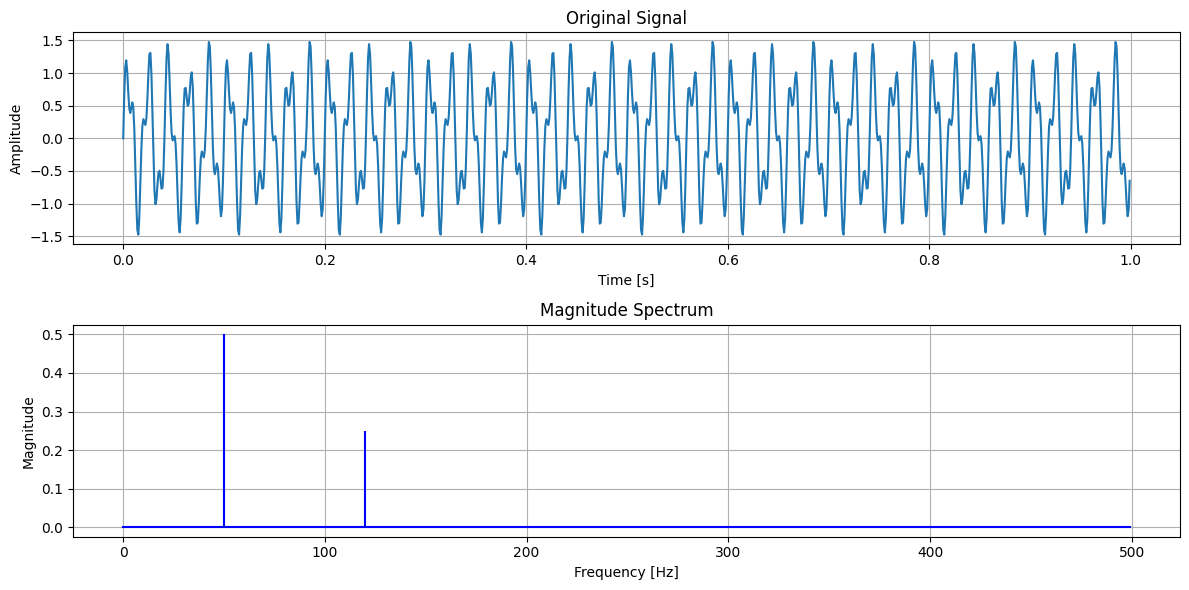

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Perform FFT
N = len(signal)
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(N, 1/fs)

# Only take the positive frequencies and corresponding FFT results
positive_freqs = fft_freq[:N//2]
positive_fft_result = fft_result[:N//2]

# Magnitude of the FFT (normalized)
magnitude = np.abs(positive_fft_result) / N

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT (magnitude spectrum)
plt.subplot(2, 1, 2)
plt.stem(positive_freqs, magnitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# What is Periodic Time Series?
A periodic time series is a time series that repeats itself at regular intervals of time. A periodic time series can be represented as a sum of sinusoidal functions with frequencies that are integer multiples of the fundamental frequency of the time series. The fundamental frequency of a periodic time series is the lowest frequency present in the time series. Periodic time series are important in many applications because they have a well-defined frequency spectrum and they can be easily analyzed using tools from Fourier analysis.

# What is Non-Periodic Time Series?
a non-periodic time series is a time series that does not repeat itself at regular intervals. This means that it does not have a fundamental frequency, and its frequency spectrum is generally not composed of discrete frequencies. Non-periodic time series can be continuous or discrete, and they can be either deterministic or random. Examples of non-periodic time series include white noise, impulses, and arbitrary waveforms. Non-periodic time series are often encountered in real-world applications, such as speech, music, and environmental noise.

# Spectral analysis in real-world
- Non-periodic signals
- Truncated signals

The "edge effect" in spectral analysis occurs when a time series is truncated (e.g., when using a sliding window) or non-periodic. Here’s why it happens:

1. **Abrupt Changes at Window Edges**: When you apply a window to the time series, the segments taken from the time series end abruptly at the window’s boundaries. This truncation introduces discontinuities at the edges, which create artifacts in the frequency domain. Specifically, Fourier analysis assumes that the time series is continuous or repeats beyond the window’s boundaries, or the integration boundaries contain full periods of the time series. So sudden changes result in spectral leakage.

2. **Spectral Leakage**: The abrupt start and end of the truncated time series segment act as high-frequency components, which appear as extra, unwanted frequencies in the analysis. These frequencies may interfere with the actual frequencies present in the time series, causing "leakage" across the spectrum and reducing the precision of frequency estimates.

3. **Loss of Periodicity**: Fourier analysis, especially using the Discrete Fourier Transform (DFT), assumes periodic time series within each window. If the original time series is not periodic, truncating it for each window creates an artificial period at the window boundaries. This introduces discontinuities in each period, resulting in extra frequency components that are not part of the true time series.

4. **Reduced Frequency Resolution**: Shorter windows (due to truncation) also reduce the frequency resolution, limiting the ability to accurately distinguish between closely spaced frequencies. This effect is amplified if the time series changes in each window, as it complicates distinguishing true time series frequencies from those introduced by window truncation.

### Mitigating Edge Effects (for further reading)
Using windowing functions (like Hamming or Hanning windows) can help reduce edge effects by gradually tapering the signal at the window edges, smoothing out abrupt changes. This reduces spectral leakage, although it doesn't eliminate it entirely.

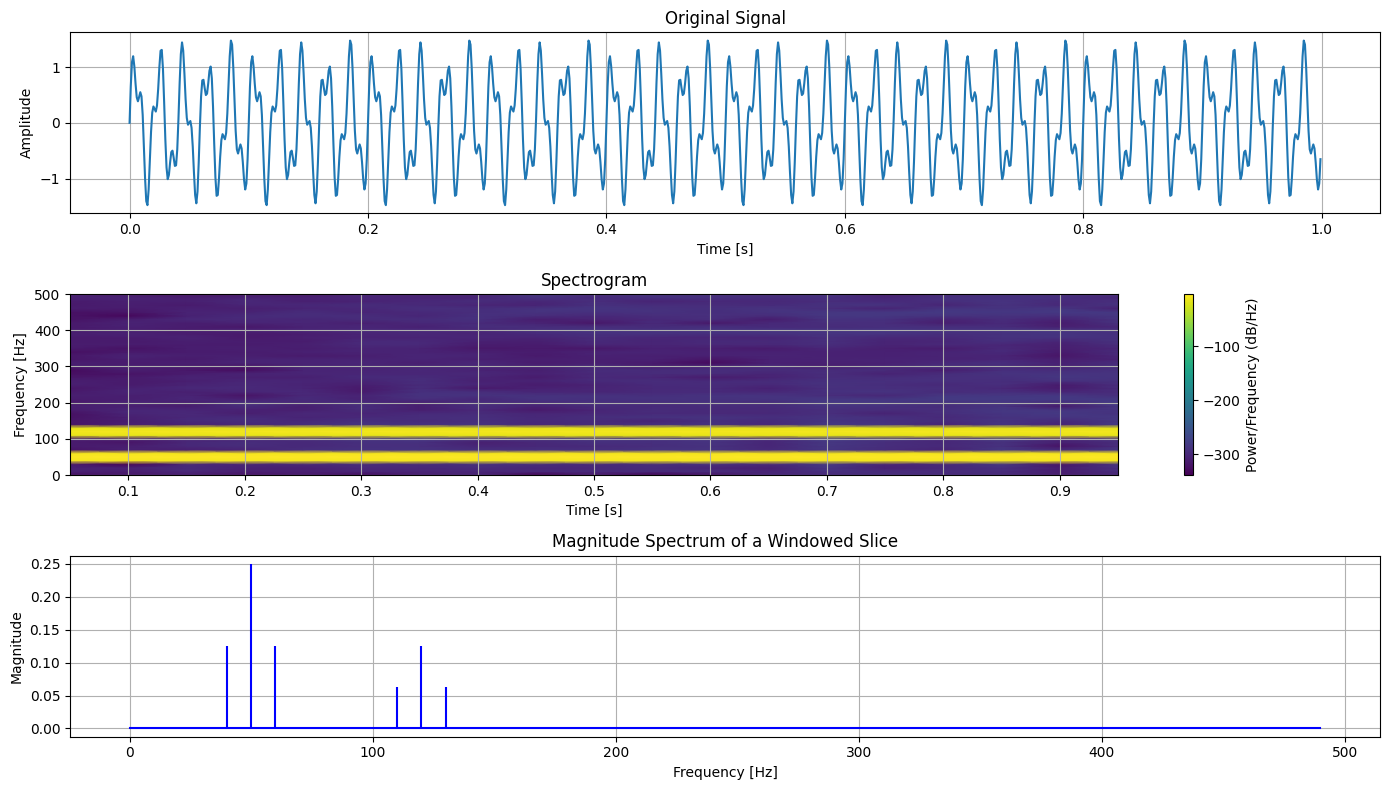

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, spectrogram

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parameters for windowing
window_length = 100  # Length of the window
window_type = 'hann'  # Type of the window (e.g., 'hann', 'hamming', etc.)
window = windows.get_window(window_type, window_length)
n_overlap = window_length // 2  # Number of overlapping samples

# Perform STFT
frequencies, times, Sxx = spectrogram(signal, fs, window=window, nperseg=window_length, noverlap=n_overlap, scaling='spectrum')

# Plot the original signal
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.grid(True)

# Illustration of windowing effect
# Select a specific time slice for illustration
time_slice = int(0.5 * fs) + 110  # Center of the signal (at 0.5 seconds)
signal_slice = signal[time_slice:time_slice + window_length] * window

# Perform FFT on the windowed signal slice
N_slice = len(signal_slice)
fft_result_slice = np.fft.fft(signal_slice)
fft_freq_slice = np.fft.fftfreq(N_slice, 1/fs)

# Only take the positive frequencies and corresponding FFT results
positive_freqs_slice = fft_freq_slice[:N_slice//2]
positive_fft_result_slice = fft_result_slice[:N_slice//2]

# Magnitude of the FFT (normalized)
magnitude_slice = np.abs(positive_fft_result_slice) / N_slice

# Plot the FFT (magnitude spectrum) of the windowed signal slice
plt.subplot(3, 1, 3)
plt.stem(positive_freqs_slice, magnitude_slice, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of a Windowed Slice')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import windows
from IPython.display import HTML

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parameters for windowing
window_length = 256  # Length of the window
window = np.ones(window_length)  # Simple rectangular window

# Setup figure and axes
fig, (ax_signal, ax_spectrum) = plt.subplots(2, 1, figsize=(14, 10))

# Plot the original signal
ax_signal.plot(t, signal)
ax_signal.set_title('Original Signal')
ax_signal.set_xlabel('Time [s]')
ax_signal.set_ylabel('Amplitude')
ax_signal.grid(True)

line_window, = ax_signal.plot([], [], 'r', linewidth=2)

# Setup the spectrum plot
ax_spectrum.set_title('Magnitude Spectrum of a Windowed Slice')
ax_spectrum.set_xlabel('Frequency [Hz]')
ax_spectrum.set_ylabel('Magnitude')
ax_spectrum.grid(True)
line_spectrum, = ax_spectrum.plot([], [], 'b')

# Define the update function for animation
def update(frame):
    # Compute the windowed signal slice
    start = frame
    end = start + window_length
    signal_slice = signal[start:end] * window

    # Perform FFT on the windowed signal slice
    N_slice = len(signal_slice)
    fft_result_slice = np.fft.fft(signal_slice)
    fft_freq_slice = np.fft.fftfreq(N_slice, 1/fs)

    # Only take the positive frequencies and corresponding FFT results
    positive_freqs_slice = fft_freq_slice[:N_slice//2]
    positive_fft_result_slice = fft_result_slice[:N_slice//2]

    # Magnitude of the FFT (normalized)
    magnitude_slice = np.abs(positive_fft_result_slice) / N_slice

    # Update the windowed signal slice plot
    line_window.set_data(t[start:end], signal[start:end] * window)

    # Update the spectrum plot
    line_spectrum.set_data(positive_freqs_slice, magnitude_slice)

    # Redraw the spectrum plot limits
    ax_spectrum.set_xlim(0, fs / 2)
    ax_spectrum.set_ylim(0, max(magnitude_slice) * 1.1)

    return line_window, line_spectrum

# Create the animation
frames = range(0, len(signal) - window_length, window_length // 2)
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


# Question) Should we use longer or shorter windows for our analyses?

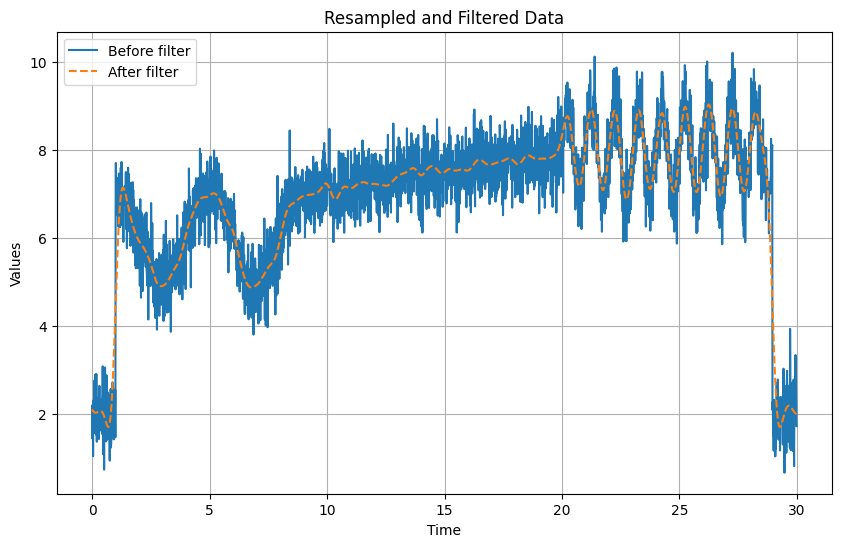

In [13]:
'''Trying different low pass filters'''

import numpy as np
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1) + 4  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2) + 6 # Example values

# Combine the two sets of example data together
combined_time = np.concatenate((time_original_1, time_original_2))
combined_values = np.concatenate((values_original_1, values_original_2))

# Define new time array with larger time interval (100 Hz)
time_resampled = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(0, 0), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_resampled = interpolator(time_resampled) + 2 + np.random.normal(0, 0.5, len(time_resampled))


def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

values_filtered = butter_lowpass_filter(values_resampled, 1.5, 100, 3)


# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


# Feature engineering for time-series



Feature engineering for time-series data is essential for building effective models, especially when the raw data doesn’t directly reveal patterns suitable for predictions or classification.

Here’s a breakdown of key domains for feature engineering in time-series:

### 1. **Time Domain**
   - **Description**: Time-domain features are extracted directly from the values of the time-series signal. These features help capture general characteristics, trends, or periodic behaviors in the time domain.
   - **Examples**:
     - **Peak location**: Where in the time series the peak happens.
     - **Autocorrelation**: Measure of similarity between observations at different time lags, indicating repeated patterns.

### 2. **Statistical Domain**
   - **Description**: Statistical features provide insights into the distribution, central tendency, and variability of the data, offering a high-level summary of the time-series.
   - **Examples**:
     - **Skewness**: Indicates whether the data is asymmetrically distributed, useful in assessing if there are more extreme values on one side.
     - **Kurtosis**: Measures the "tailedness" of the distribution, identifying if extreme deviations are frequent.
     - **Percentiles**: Different quantiles (like median, upper, and lower quartiles) give insights into the data's spread.
     - **Entropy**: Quantifies the randomness or disorder within the signal.
     - **Example Use Case**: In speech signal processing, skewness and kurtosis help identify whether certain sounds or energy levels occur more often, which aids in speaker recognition.

### 3. **Amplitude Domain**
   - **Description**: Amplitude-domain features deal with the signal’s magnitude or energy over time, capturing peaks and intensity levels within the signal.
   - **Examples**:
     - **Root Mean Square (RMS)**: Provides the energy or power in the signal, often used to detect the strength of vibrations or audio signals.
     - **Max and Min Amplitude**: Tracks the extreme amplitude values, helping detect signal spikes or drops.
     - **Signal Envelope**: A smoothed outline capturing the signal’s general amplitude trend.
     - **Example Use Case**: In EEG signal analysis, the RMS and peak amplitudes can indicate neural activities' strength and intensity over specific periods.

### 4. **Spectral Domain**
   - **Description**: Spectral (or frequency) domain features are obtained by transforming the signal from the time domain to the frequency domain, often using the Fourier Transform. These features reveal the frequency content and are helpful for identifying periodicities and oscillations in the signal.
   - **Examples**:
     - **Dominant Frequency**: The primary frequency component in the signal, which can reveal recurring patterns or cycles.
     - **Spectral Entropy**: Quantifies the distribution of energy across different frequency bands, giving insights into the signal’s complexity.
     - **Spectral Centroid**: The center of mass of the spectral power, indicating where the signal’s power is concentrated.
     - **Spectral Band Power**: The power in specific frequency bands (e.g., delta, theta, alpha bands in EEG).
     - **Example Use Case**: In wearable heart monitoring, dominant frequencies can indicate heart rate, while spectral band power in EEG data can signal different brain states.

### 5. **Time-Frequency Domain (for your reading)**
   - **Description**: The time-frequency domain combines information from both time and frequency domains, capturing how frequency content changes over time. This is useful when the signal’s frequency characteristics vary, as in non-stationary signals.
   - **Examples**:
     - **Wavelet Transform Coefficients**: Decomposes the signal at multiple scales, capturing both frequency and time variations, commonly used for transient or abrupt changes.
     - **Short-Time Fourier Transform (STFT)**: Divides the signal into short segments and performs Fourier analysis on each, providing a spectrum for each time window.
     - **Hilbert-Huang Transform (HHT)**: An adaptive method capturing time-frequency features, suitable for non-linear and non-stationary signals.
     - **Mel-Frequency Cepstral Coefficients (MFCCs)**: Common in audio processing, MFCCs represent the signal’s power spectrum in terms of Mel-frequency bands.
     - **Example Use Case**: For human activity recognition, wavelet transforms can capture quick bursts of movement, while MFCCs in speech recognition help differentiate between phonemes and tones.


Useful libraries:<br>
- https://github.com/mehdieji/tifex-py
- https://tsfel.readthedocs.io/en/latest/index.html
- https://tsfresh.readthedocs.io/en/latest/

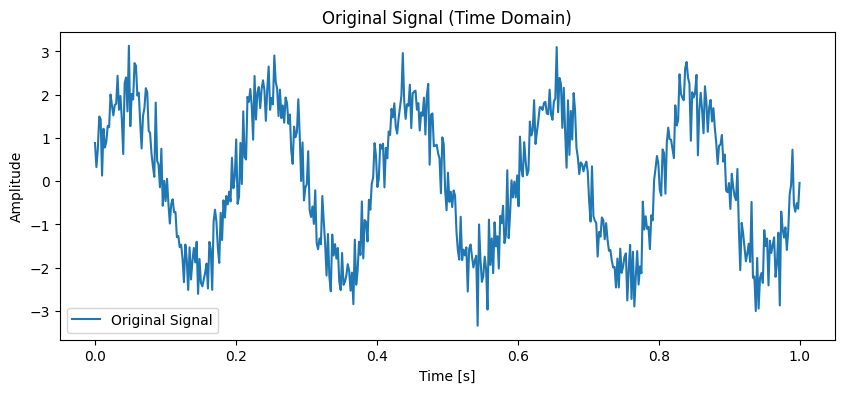

Extracted Features:
              Feature          Value
0                Mean      -0.012677
1  Standard Deviation       1.524065
2        Peak-to-Peak       6.470605
3            Skewness      -0.038490
4            Kurtosis      -1.193419
5       Max Amplitude       3.131301
6       Min Amplitude      -3.339304
7       RMS Amplitude       1.524118
8  Dominant Frequency       4.990000
9      Dominant Power  260240.584007


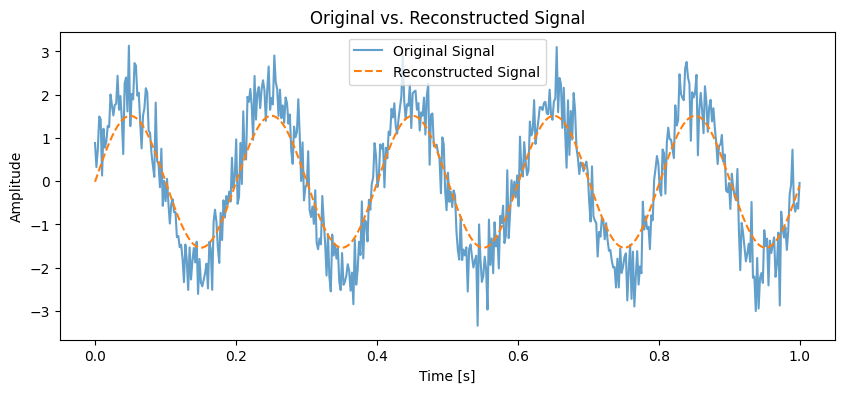

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.stats import skew, kurtosis

# Generate an artificial time-series signal
np.random.seed(0)
time = np.linspace(0, 1, 500)  # 500 time points over 1 second
frequency = 5  # 5 Hz signal frequency
amplitude = 2
noise = np.random.normal(0, 0.5, time.shape)  # Gaussian noise
signal = amplitude * np.sin(2 * np.pi * frequency * time) + noise

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Original Signal (Time Domain)")
plt.legend()
plt.show()

# Feature Generation
# 1. Time Domain Features
peak_to_peak = np.ptp(signal)  # Difference between max and min

# 2. Statistical Features
mean_val = np.mean(signal)
std_dev = np.std(signal)
signal_skewness = skew(signal)
signal_kurtosis = kurtosis(signal)

# 3. Amplitude Domain Features
max_amplitude = np.max(signal)
min_amplitude = np.min(signal)
rms_amplitude = np.sqrt(np.mean(signal**2))  # Root mean square amplitude

# 4. Spectral Domain Features
# Perform FFT to get frequency components
signal_fft = fft(signal)
signal_freq = fftfreq(len(signal), time[1] - time[0])
power_spectrum = np.abs(signal_fft)**2

# Dominant frequency (excluding zero-frequency component)
dominant_freq = signal_freq[np.argmax(power_spectrum[1:]) + 1]
dominant_power = np.max(power_spectrum[1:])

# Display extracted features
features = {
    "Mean": mean_val,
    "Standard Deviation": std_dev,
    "Peak-to-Peak": peak_to_peak,
    "Skewness": signal_skewness,
    "Kurtosis": signal_kurtosis,
    "Max Amplitude": max_amplitude,
    "Min Amplitude": min_amplitude,
    "RMS Amplitude": rms_amplitude,
    "Dominant Frequency": dominant_freq,
    "Dominant Power": dominant_power,
}

# Converting to DataFrame
features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Value"])
print("Extracted Features:")
print(features_df)

# Reconstructing the signal using key features
reconstructed_signal = rms_amplitude * np.sin(2 * np.pi * dominant_freq * time) + mean_val

# Plot the reconstructed signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Original Signal", alpha=0.7)
plt.plot(time, reconstructed_signal, label="Reconstructed Signal", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Original vs. Reconstructed Signal")
plt.legend()
plt.show()


# Understanding the Curse of Dimensionality
(will be discussed in detail in later tutorials)

# Experiemnts with the tutorial dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
# Example of reading a CSV file with pandas
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Data/ai_in_rehab_2025_tutorial/data_subjects_info.csv'
df = pd.read_csv(file_path)

print(df.head())

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Data/ai_in_rehab_2025_tutorial/'
n_subjects = 24

trials = {
    'downstairs': {'dws_1', 'dws_2', 'dws_11'},
    'upstairs': {'ups_3', 'ups_4', 'ups_12'},
    'walking': {'wlk_7', 'wlk_8', 'wlk_15'},
    'sitting': {'sit_5', 'sit_13'},
    'standing': {'std_6', 'std_14'},
    'jogging': {'jog_9', 'jog_16'}
}

import pandas as pd
import numpy as np

def load_with_timestamp(path, sample_rate=50):
    df = pd.read_csv(path)

    # remove the unnamed first col (sample index from file)
    df = df.drop(df.columns[0], axis=1)

    # compute timestamps (ns precision to avoid float issues)
    n_samples = len(df)
    timestamps = np.arange(n_samples) * (1e9 / sample_rate)  # in nanoseconds
    # make into datetime64[ns] starting at unix epoch (0)
    df.insert(0, "datetime", pd.to_datetime(timestamps, unit="ns"))

    timestamps = np.arange(n_samples) / sample_rate  # [0, 0.02, 0.04, ...]
    df.insert(1, "timestamp", timestamps)

    return df


data = {}

for i_subject in range(1, n_subjects+1):
  subject = f'sub_{i_subject}'
  data[subject] = {}
  for activity in trials.keys():
    data[subject][activity] = {}
    for trial in trials[activity]:
      df_acc_path = data_path + f'Accelerometer_data/{trial}/{subject}.csv'
      df_acc = load_with_timestamp(df_acc_path)
      df_gyro_path = data_path + f'Gyroscope_data/{trial}/{subject}.csv'
      df_gyro = load_with_timestamp(df_gyro_path)

      data[subject][activity][trial] = {
          "acc": df_acc,
          "gyro": df_gyro
      }
  print(f"Loaded {subject}")

# Completeness analysis

In [ ]:
import numpy as np

def completeness_analysis(df, sample_rate=50):
    """
    Computes completeness of a time series given a sample rate.
    Completeness = actual_samples / expected_samples
    """
    if df.empty:
        return 0.0

    # Get time span in seconds
    time_span = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]

    # Expected number of samples
    expected_samples = int(time_span * sample_rate) + 1

    # Actual number of samples (non-NaN rows)
    actual_samples = df.dropna().shape[0]

    return actual_samples / expected_samples


# Loop through all subjects, activities, trials, and sensors
for subject, activities in data.items():
    print(f"\n=== Completeness for {subject} ===")
    for activity, trials_dict in activities.items():
        for trial, sensors in trials_dict.items():
            for sensor_name, df in sensors.items():
                comp = completeness_analysis(df, sample_rate=50)
                print(f"{activity:<10} | {trial:<6} | {sensor_name:<4} | Completeness: {comp:.2%}")


# Example of applying filter to our data

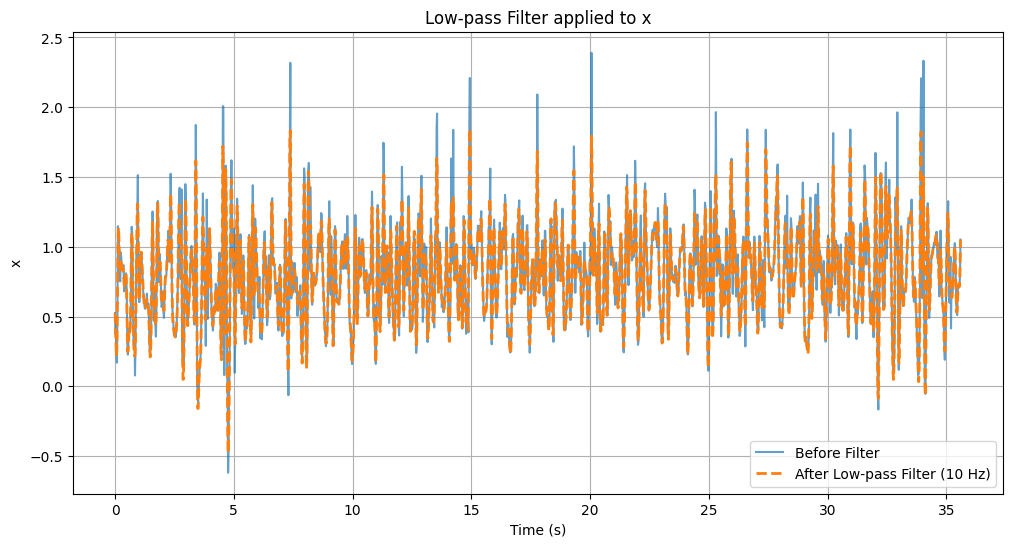

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


def apply_lowpass_filter(df, cutoff=10, fs=50, order=3, plot=False):
    """
    Applies a low-pass filter to a dataframe with columns:
      - 'timestamp' (in seconds)
      - one signal column (e.g. x, y, z)
    Adds a 'filtered' column and plots before vs after.
    """
    # Identify the signal column (everything except 'timestamp')
    value_cols = [col for col in df.columns if col != 'timestamp']
    if len(value_cols) != 1:
        raise ValueError("DataFrame must have exactly one signal column besides 'timestamp'")
    value_col = value_cols[0]

    # Extract
    t = df['timestamp'].values
    x = df[value_col].values

    # Filter
    x_filtered = butter_lowpass_filter(x, cutoff, fs, order)

    if plot == True:
      # Plot
      plt.figure(figsize=(12, 6))
      plt.plot(t, x, label='Before Filter', alpha=0.7)
      plt.plot(t, x_filtered, label=f'After Low-pass Filter ({cutoff} Hz)', linestyle='--', linewidth=2)
      plt.xlabel('Time (s)')
      plt.ylabel(value_col)
      plt.title(f'Low-pass Filter applied to {value_col}')
      plt.legend()
      plt.grid(True)
      plt.show()

    # Return dataframe with filtered column
    df_out = df.copy()
    df_out['filtered'] = x_filtered
    return df_out



# Suppose df_signal has columns ["Timestamp", "Value"]
df_signal = data['sub_1']['downstairs']['dws_1']['acc'][['timestamp', 'x']]
df_filtered = apply_lowpass_filter(df_signal, cutoff=10, fs=50, order=3, plot=True)


# Apply this filter to all trials and save a new dict.

In [51]:
filtered_data[subject][activity][trial].keys()

dict_keys(['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])

In [31]:
filtered_data[subject][activity][trial]['acc_x']

timestamp         x  filtered
0         0.00  1.702087  1.701542
1         0.02  0.642639  0.553228
2         0.04 -0.285095 -0.195292
3         0.06 -0.716202 -0.439138
4         0.08 -0.209137 -0.450993
..         ...       ...       ...
805      16.10  0.663437  0.627197
806      16.12  0.527435  0.146152
807      16.14 -0.838379 -0.617957
808      16.16 -1.427063 -1.020098
809      16.18 -0.884476 -0.885940

[810 rows x 3 columns]

# Feature extraction

In [37]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.stats import skew, kurtosis

feature_rows = []

for subject in filtered_data:
    for activity in filtered_data[subject]:
        for trial in filtered_data[subject][activity]:
            row_features = {
                "subject": subject,
                "activity": activity,
                "trial": trial
            }

            for modality_name, modality_df in filtered_data[subject][activity][trial].items():
                signal = modality_df['filtered'].values
                time = modality_df['timestamp'].values

                # skip invalid or too short signals
                if len(signal) < 5 or np.all(signal == signal[0]):
                    continue

                dt = np.mean(np.diff(time))
                fs = 1 / dt

                # --- Time-domain features ---
                mean_val = np.mean(signal)
                std_val = np.std(signal)
                peak_to_peak = np.ptp(signal)
                signal_skew = skew(signal)
                signal_kurt = kurtosis(signal)

                # --- Amplitude-domain features ---
                max_amp = np.max(signal)
                min_amp = np.min(signal)
                rms_amp = np.sqrt(np.mean(signal**2))

                # --- Spectral-domain features ---
                signal_fft = fft(signal)
                freqs = fftfreq(len(signal), d=dt)
                power_spectrum = np.abs(signal_fft)**2

                if len(power_spectrum) > 1:
                    dominant_idx = np.argmax(power_spectrum[1:]) + 1
                    dominant_freq = freqs[dominant_idx]
                    dominant_power = power_spectrum[dominant_idx]
                else:
                    dominant_freq = np.nan
                    dominant_power = np.nan

                # prefix all feature names with the modality
                prefix = modality_name
                row_features.update({
                    f"{prefix}_mean": mean_val,
                    f"{prefix}_std": std_val,
                    f"{prefix}_ptp": peak_to_peak,
                    f"{prefix}_skew": signal_skew,
                    f"{prefix}_kurtosis": signal_kurt,
                    f"{prefix}_max": max_amp,
                    f"{prefix}_min": min_amp,
                    f"{prefix}_rms": rms_amp,
                    f"{prefix}_dom_freq": dominant_freq,
                    f"{prefix}_dom_power": dominant_power
                })

            # add this trial’s feature row
            feature_rows.append(row_features)

# ---- Combine into one DataFrame ----
features_df = pd.DataFrame(feature_rows)


In [38]:
features_df

subject    activity   trial  acc_x_mean  acc_x_std  acc_x_ptp  acc_x_skew  \
0     sub_1  downstairs   dws_2       -0.05       0.27       2.31       -0.29   
1     sub_1  downstairs   dws_1        0.81       0.32       2.32        0.06   
2     sub_1  downstairs  dws_11        0.04       0.24       1.89        0.20   
3     sub_1    upstairs   ups_4        0.36       0.24       2.01       -0.24   
4     sub_1    upstairs   ups_3       -0.29       0.27       1.79       -0.33   
..      ...         ...     ...         ...        ...        ...         ...   
355  sub_24     sitting  sit_13       -0.65       0.02       0.47        1.97   
356  sub_24    standing   std_6        0.01       0.07       0.81        0.06   
357  sub_24    standing  std_14       -0.18       0.08       0.65        0.61   
358  sub_24     jogging   jog_9       -0.38       1.19       6.80       -0.06   
359  sub_24     jogging  jog_16       -0.17       0.96       5.09        0.12   

     acc_x_kurtosis  acc_x_max  acc_x_min  ...  gyro_z_mean  gyro_z_std  \
0              1.44       1.09      -1.23  ...     1.92e-01        0.63   
1              0.30       1.84      -0.48  ...     1.44e-01        0.67   
2              0.15       1.10      -0.78  ...     2.14e-01        0.63   
3              0.76       1.38      -0.63  ...     1.32e-02        0.89   
4              0.37       0.46      -1.33  ...     4.50e-02        0.87   
..              ...        ...        ...  ...          ...         ...   
355          107.36      -0.40      -0.87  ...     2.13e-03        0.04   
356            0.64       0.36      -0.45  ...     3.36e-03        0.11   
357           -0.13       0.14      -0.51  ...     4.22e-03        0.12   
358           -0.03       2.56      -4.23  ...     2.26e-02        3.97   
359           -0.38       2.46      -2.63  ...     5.77e-03        3.59   

     gyro_z_ptp  gyro_z_skew  gyro_z_kurtosis  gyro_z_max  gyro_z_min  \
0          4.27         0.36             0.56        2.48       -1.79   
1          4.27         0.22             0.39        2.50       -1.78   
2          4.19         0.74             0.89        2.61       -1.58   
3         10.79         1.90             9.39        7.72       -3.07   
4          4.95         0.80             0.31        3.15       -1.80   
..          ...          ...              ...         ...         ...   
355        0.99        -4.19           104.58        0.38       -0.60   
356        1.95         0.29            17.05        1.01       -0.94   
357        1.74         1.47            14.58        0.99       -0.75   
358       17.64        -0.14            -0.85        8.37       -9.27   
359       17.22        -0.01            -0.62        8.83       -8.39   

     gyro_z_rms  gyro_z_dom_freq  gyro_z_dom_power  
0          0.66             1.02          4.71e+04  
1          0.69             0.94          2.79e+04  
2          0.67             1.40          9.39e+03  
3          0.89             0.93          3.75e+05  
4          0.87             0.89          2.49e+05  
..          ...              ...               ...  
355        0.04             2.66          1.17e+02  
356        0.11             0.53          1.00e+04  
357        0.12             0.84          3.74e+03  
358        3.97             1.48          1.22e+07  
359        3.59             1.46          1.92e+06  

[360 rows x 63 columns]

In [39]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject           360 non-null    object 
 1   activity          360 non-null    object 
 2   trial             360 non-null    object 
 3   acc_x_mean        360 non-null    float64
 4   acc_x_std         360 non-null    float64
 5   acc_x_ptp         360 non-null    float64
 6   acc_x_skew        360 non-null    float64
 7   acc_x_kurtosis    360 non-null    float64
 8   acc_x_max         360 non-null    float64
 9   acc_x_min         360 non-null    float64
 10  acc_x_rms         360 non-null    float64
 11  acc_x_dom_freq    360 non-null    float64
 12  acc_x_dom_power   360 non-null    float64
 13  acc_y_mean        360 non-null    float64
 14  acc_y_std         360 non-null    float64
 15  acc_y_ptp         360 non-null    float64
 16  acc_y_skew        360 non-null    float64
 1

In [40]:
# Show 3 decimals instead of scientific notation or too many
pd.set_option("display.precision", 2)
features_df.describe()  # Summary statistics for numerical data

acc_x_mean  acc_x_std  acc_x_ptp  acc_x_skew  acc_x_kurtosis  \
count    3.60e+02   3.60e+02     360.00      360.00          360.00   
mean     3.13e-02   2.54e-01       1.76        0.13            5.74   
std      3.07e-01   2.02e-01       1.16        1.30           20.02   
min     -9.94e-01   4.04e-03       0.05       -6.94           -1.68   
25%     -1.57e-01   8.78e-02       0.95       -0.38            0.05   
50%      9.16e-03   2.35e-01       1.65       -0.05            0.54   
75%      2.17e-01   3.41e-01       2.35        0.37            1.49   
max      1.03e+00   1.35e+00       6.88       11.74          166.49   

       acc_x_max  acc_x_min  acc_x_rms  acc_x_dom_freq  acc_x_dom_power  ...  \
count     360.00     360.00     360.00        3.60e+02         3.60e+02  ...   
mean        0.92      -0.84       0.39        1.84e+00         5.64e+04  ...   
std         0.71       0.69       0.23        1.79e+00         1.90e+05  ...   
min        -0.65      -4.23       0.01        4.16e-03         2.36e+00  ...   
25%         0.46      -1.21       0.24        2.33e-02         3.52e+03  ...   
50%         0.79      -0.78       0.34        1.37e+00         1.02e+04  ...   
75%         1.29      -0.46       0.49        3.10e+00         4.27e+04  ...   
max         4.94       0.70       1.67        7.96e+00         3.14e+06  ...   

       gyro_z_mean  gyro_z_std  gyro_z_ptp  gyro_z_skew  gyro_z_kurtosis  \
count     3.60e+02    3.60e+02      360.00       360.00           360.00   
mean      1.53e-02    7.16e-01        4.30        -0.02            16.45   
std       7.91e-02    6.11e-01        3.00         1.93            43.45   
min      -2.48e-01    5.11e-03        0.08       -18.31            -1.34   
25%      -1.00e-02    1.02e-01        1.96        -0.35            -0.36   
50%       4.16e-03    6.52e-01        4.03         0.11             0.16   
75%       6.52e-02    9.93e-01        5.85         0.48             6.86   
max       2.14e-01    3.97e+00       17.64        11.14           435.25   

       gyro_z_max  gyro_z_min  gyro_z_rms  gyro_z_dom_freq  gyro_z_dom_power  
count      360.00      360.00    3.60e+02           360.00          3.60e+02  
mean         2.17       -2.13    7.20e-01             1.29          8.86e+05  
std          1.54        1.57    6.11e-01             0.91          2.18e+06  
min          0.02       -9.27    5.95e-03             0.03          2.80e+00  
25%          1.02       -2.86    1.02e-01             0.83          3.99e+03  
50%          2.06       -1.89    6.64e-01             0.96          8.04e+04  
75%          2.98       -0.96    9.97e-01             1.44          5.19e+05  
max          8.83       -0.03    3.97e+00             5.41          1.38e+07  

[8 rows x 60 columns]

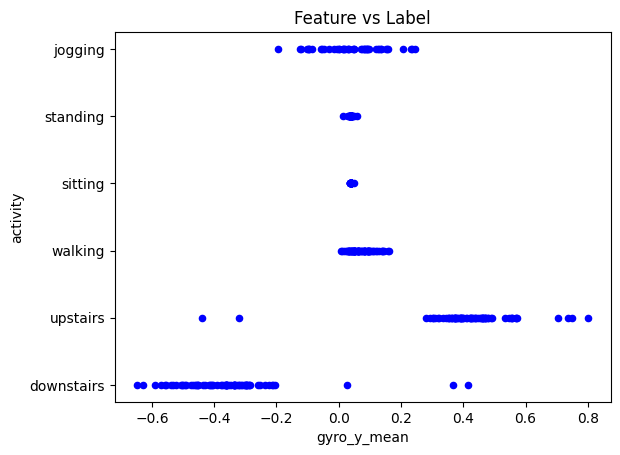

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for BMI vs Disease Progression
features_df.plot(kind='scatter', x='gyro_y_mean', y='activity', title='Feature vs Label', color='blue')

# plt.ylabel('Disease Progression')
plt.show()



# A small exercise!

* Create a similar feature dataframe, but instead of extracting features from the whole trial, have a sliding window of 10s with a step size of 3s and extract features for every window.

* Introduce some of the good features based on the scatter plots of feature vs activity. See if you can find better features! You can get help from the available features in TIFEX-Py.